# <center>Đồ án Python: Titanic</center>
<p align="center">
    <img src="https://cdnphoto.dantri.com.vn/i3Jsd2-396ndL0FFeu8kSezUC6I=/2023/06/24/8-1687616972199.jpg" width="900" height="400" >
</p>

In [55]:
# impport thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
train_df = pd.read_csv('./data/train.csv')
test_df=pd.read_csv('./data/test.csv')

In [57]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [58]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Ghi chú:
* Survived: là khả năng sống sót 0=Chêt, 1=Sống
* Pclass: là hạng vé trong chuyến đi ví dụ 1 = 1st, 2 = 2nd, 3 = 3rd
* Sex: là giới tính
* Age: là độ tuổi của người đi trong lúc trên chuyến tàu
* SibSp: là anh chị em/vợ chồng trên tàu Titanic
* Parch: là số cha mẹ/trẻ em trên tàu Titanic
* Ticket: là số vé 
* Fare: giá vé hành khách
* Cabin: só cabin
* Embarked: cảng mà tàu đón người đó C = Cherbourg, Q = Queenstown, S = Southampton


In [59]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Đổi PassengerId thành cột ID vì nó không trực tiếp tham gia vào chuyện dự đoán

In [60]:
train_df.set_index(train_df.PassengerId,inplace=True)
train_df.drop('PassengerId',axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Phân loại kiểu dữ liệu: kiểu phân loại(Categorical) và số(numerial)
*   Kiểu dữ liệu phân loại là gì:
    *   Dữ liệu phân loại (categorical data) là một nhóm dữ liệu/danh mục (thường là dữ liệu định tính) được phân chia thành các nhóm rời rạc.
    *   Trong bài này kiểu dữ liệu phân loại sẽ là: Survived, Pclass, Parch, Sex, SibSp, Embarked.
*   Kiểu dữ liệu số là gì:
    *   Dữ liệu sẽ bao gồm số thập phân và số nguyên.
    *   Trong bài này kiểu số là Age, Fare

In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [62]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [63]:
train_df["Survived"]=train_df["Survived"].astype('category')

In [64]:
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [65]:
features =["Pclass","Parch","Sex","SibSp","Embarked"]
def convert(df,features):
    for feature in features:
        df[feature] = df[feature].astype('category')
convert(train_df,features)
convert(test_df,features)

In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [67]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    category
 6   Parch        418 non-null    category
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    category
dtypes: category(5), float64(2), int64(1), object(3)
memory usage: 22.8+ KB


## Mô tả chi tiết cho kiểu dữ liệu số

In [68]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


## Mô tả chi tiết cho kiểu dữ liệu phân loại:

In [69]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## Phân tích khai phá kiểu dữ liệu phân loại:

### Biến mục tiêu: Survived

In [70]:
train_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [71]:
train_df["Survived"].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


### Sex

In [72]:
train_df['Sex'].value_counts().to_frame()

,count
Sex,
male,577
female,314


In [73]:
train_df['Sex'].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


<Axes: xlabel='Sex', ylabel='count'>

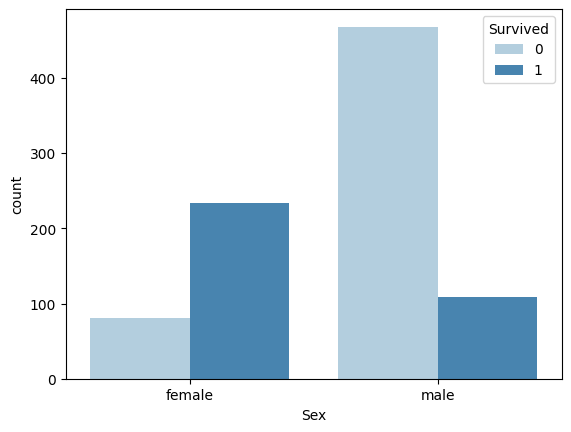

In [74]:
sns.countplot(data=train_df,x='Sex', hue='Survived', palette='Blues')

### Các kiểu dữ liệu phân loại còn lại

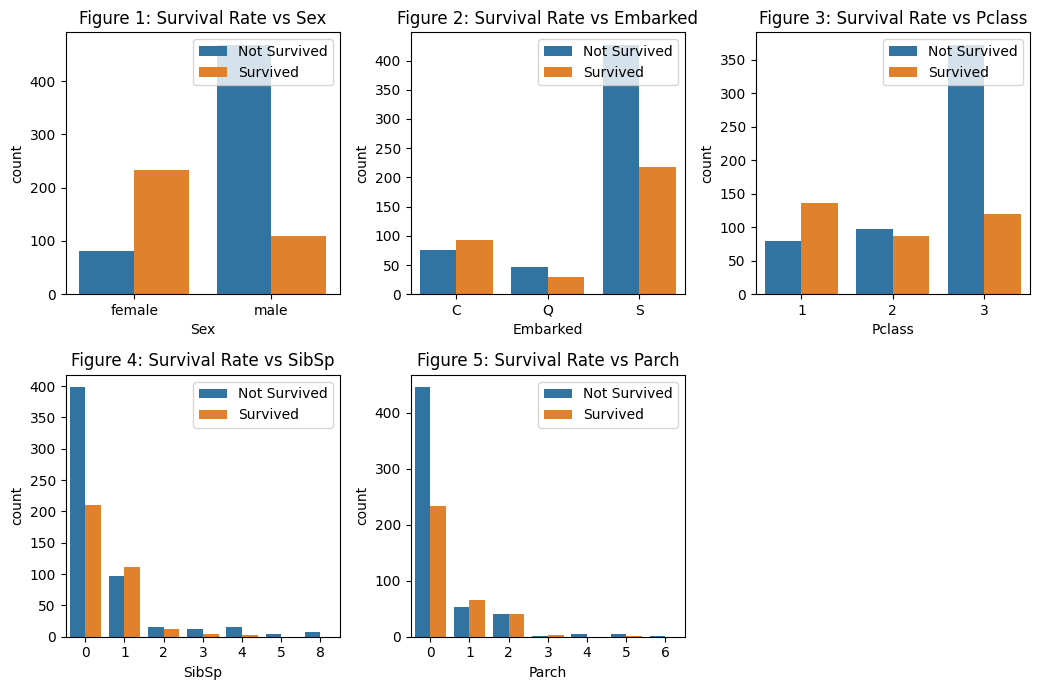

In [75]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_row = 2
n_cols = 3

fig, ax = plt.subplots(n_row, n_cols, figsize=(n_cols*3.5, n_row*3.5))

for r in range(0,n_row):
    for c in range(0,n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df, x=cols[i], hue='Survived', ax=ax_i)
            ax_i.set_title(f'Figure {i+1}: Survival Rate vs {cols[i]}')
            ax_i.legend(title='', loc='upper right', labels = ['Not Survived', 'Survived'])
ax.flat[-1].set_visible(False) # xóa subplot cuối
plt.tight_layout()            

# Phân tích khai phá kiểu dữ liệu dạng số

## Age

<Axes: xlabel='Age', ylabel='Count'>

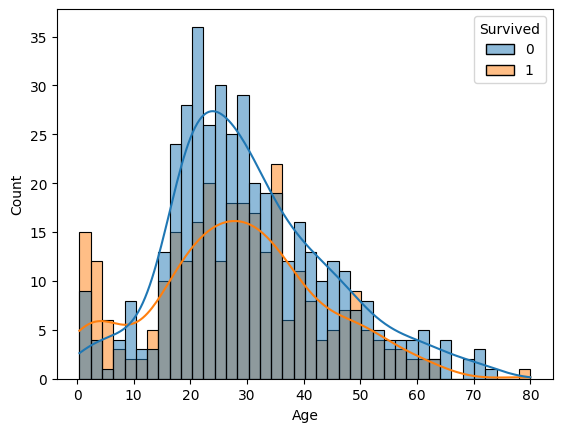

In [76]:
sns.histplot(data=train_df, x='Age', hue='Survived', bins = 40, kde=True)

## Fare

In [77]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

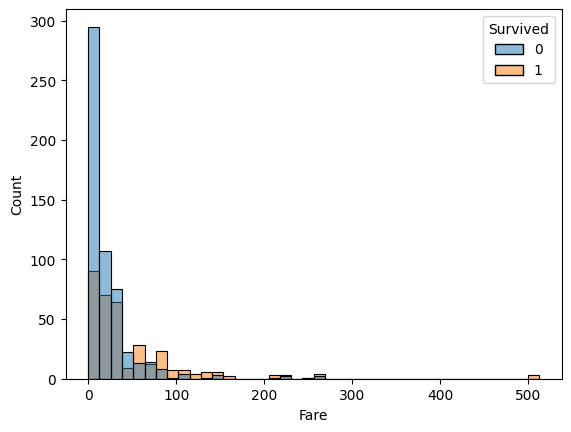

In [78]:
sns.histplot(data=train_df, x='Fare', hue = 'Survived', bins = 40)

#### Chia nhỏ khoảng cách thành (%) 0-25, 25-50, 50-75, 75-100

<Axes: xlabel='Fare', ylabel='count'>

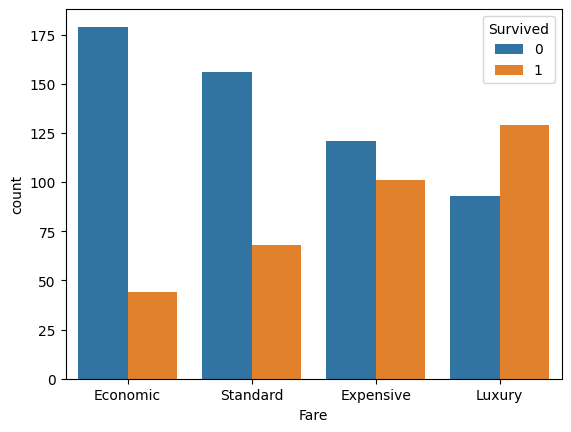

In [79]:
fare_categories = ['Economic', 'Standard','Expensive' ,'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels=fare_categories)

sns.countplot(x=quartile_data, hue= train_df['Survived'])

In [80]:
train_df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64